## Mathematics of Machine Learning

### Cross Validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import svm
from sklearn.metrics import accuracy_score

#### (0) Data Preparation

In [2]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')

# print(x)
# print(x.shape)
# print(y)
# print(y.shape)


In [3]:
# Arrange data randomly
m = len(y)
# permutation = np.random.permutation(m)

# y = y[permutation]
# x = x[:, permutation]


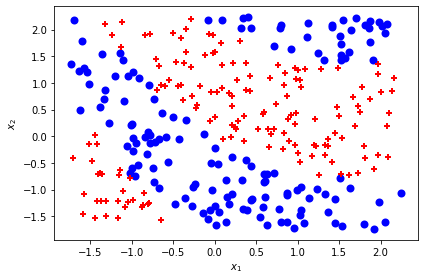

In [26]:
# Plot the training data

fig, ax = plt.subplots()

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

plt.xlabel("$ x_{1} $")
plt.ylabel("$ x_{2} $")

fig.tight_layout()

#### (a) and (b) Cross-Validation

In [5]:
# Lambda for Soft Rule
lam = 0.5/m

print(m)
print(lam)

300
0.0016666666666666668


In [6]:
# Number of blocks (folds)
K = 10
batch_size = m/K

In [7]:
# Scaling parameter
kappas = 2**np.array([i for i in np.arange(-2, 3.25, 0.25)])
print(kappas)

[0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.         4.75682846
 5.65685425 6.72717132 8.        ]


In [8]:
# Loop over kappa values
CV_error = [0] * len(kappas)

for j in range(len(kappas)):
    kappa = kappas[j]
    
    # Cross-Validation loop over folds
    for k in range(K):
        indizes_test = [int(i + (k) * batch_size) for i in range(int(batch_size))]
        indizes_train = np.setdiff1d([i for i in range(m)], indizes_test)

        # Training data
        x_train = x[:, indizes_train]
        y_train = y[indizes_train]
        
        # Learn from training data
        KSVM = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa)
        KSVM.fit(x_train.T, y_train)
        
        # Test data
        x_test = x[:, indizes_test]
        y_test = y[indizes_test]
        
        # Update CV error for loss
        h_test = KSVM.predict(x_test.T)
        CV_error[j] = CV_error[j] + (1 - accuracy_score(y_test, h_test))
        
    CV_error[j] = CV_error[j]/K


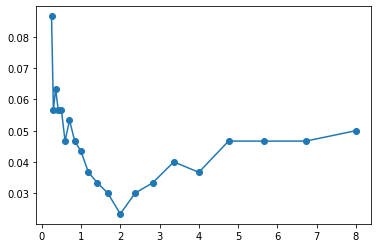

In [9]:
# Plot
plt.plot(kappas, CV_error,'o-')
plt.show()

#### c) Relearn the best and worst hypotheses

In [10]:
CV_min = min(CV_error)
j_min = CV_error.index(CV_min)

CV_max = max(CV_error)
j_max = CV_error.index(CV_max)

print(f'CV_min: {CV_min}, j_min: {j_min}')
print(f'CV_max: {CV_max}, j_min: {j_max}')

CV_min: 0.023333333333333327, j_min: 12
CV_max: 0.08666666666666664, j_min: 0


In [11]:
kappa_best = kappas[j_min]
kappa_worst = kappas[j_max]

print(kappa_best)
print(kappa_worst)

2.0
0.25


In [12]:
# Learning from ALL training data
KSVM_best = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa_best)
KSVM_best.fit(x.T, y)

KSVM_worst = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa_worst)
KSVM_worst.fit(x.T, y)

SVC(gamma=0.25)

Plot the learned hypothesis

In [13]:
# Generate discretization grid
x_min = -1.75
x_max = 2.25
y_min = -1.75
y_max = 2.25

XX1, XX2 = np.mgrid[x_min:x_max + 4/500:4/500, y_min:y_max + 4/500:4/500]

In [14]:
# Decision functions
Z_best = KSVM_best.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
# print('Z_best', Z_best)

Z_best = Z_best.reshape(XX1.shape)
print(Z_best.shape)

Z_worst = KSVM_worst.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
# print('Z_worst', Z_worst)

Z_worst = Z_worst.reshape(XX1.shape)
print(Z_worst.shape)

(501, 501)
(501, 501)


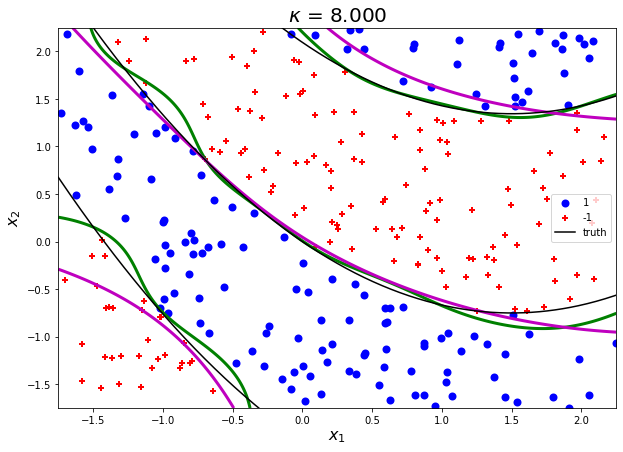

In [28]:
# Plotting the dividing lines

fig, ax = plt.subplots(figsize=(10, 7))

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot learned dividing lines
plt.contour(XX1, XX2, Z_best, levels = 0, colors='g', linewidths=3)  # label = "$h_S$"
plt.contour(XX1, XX2, Z_worst, levels = 0, colors='m', linewidths=3)  # label = "$h_S$"

# Plot true dividing lines
x1 = XX1[:, 0]
plt.plot(x1, (x1**2 - 3*x1 - 2*0)/3, '-k', label = "truth")
plt.plot(x1, (x1**2 - 3*x1 - 2*np.pi)/3, '-k')
plt.plot(x1, (x1**2 - 3*x1 + 2*np.pi)/3, '-k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())

plt.legend()
plt.xlabel("$ x_{1} $", fontsize=16)
plt.ylabel("$ x_{2} $", fontsize=16)
plt.title(f'$ \kappa $ = {kappa:.3f}', fontsize=20)
plt.show()

#### d) Compare CV error to estimated generalization error

In [39]:
# Generate new data
x_new = np.random.uniform(low=-1.75, high=2.253, size=(2, m))

In [40]:
# True multivariate function for classification:
def f_true(x): return np.sin(0.5*(x[0, :]**2 - 3*(x[1, :] + x[0, :])))

In [41]:
# Corresponding markings
y_new = 2* (f_true(x_new) > 0) - 1
print(y_new)

[ 1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1
  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1
 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1
 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1
  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1
 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1
 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1]


In [42]:
error_gen_best = 1 - accuracy_score(y_new, KSVM_best.predict(x_new.T))
print(error_gen_best)
print(CV_min)

0.036666666666666625
0.023333333333333327


In [43]:
error_gen_worst = 1 - accuracy_score(y_new, KSVM_worst.predict(x_new.T))
print(error_gen_worst)
print(CV_max)

0.09999999999999998
0.08666666666666664
